###  BUSINESS UNDERSTANDING
Primary Objective: Predict firm-level loss reporting

Target Variable: LOSS_FLAG (1 if profit_loss_before_tax < 0)

Key Predictors: Financial ratios, cost structures, firm characteristics

Stakeholders: Kenya Revenue Authority, National Treasury
 

### DATA UNDERSTANDING


In [1]:
# Load data
import pandas as pd
import numpy as np
df = pd.read_csv('CIT2024.csv', low_memory=False)

print(f"• Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"• Time Period: {df['period_from'].min()} to {df['period_to'].max()}")
print()

# Target Variable Check
print("Target Variable Check:")
if 'profit_loss_before_tax' in df.columns:
    loss_rate = (df['profit_loss_before_tax'] < 0).mean() * 100
    print(f"   ✓ profit_loss_before_tax present → Loss rate: {loss_rate:.1f}%")
else:
    print("   ✗ WARNING: Target variable not found!")
print()

# Key Predictor Availability
print("Key Predictor Availability:")
key_vars = ['grossturnover', 'gross_profit', 'total_employment_exp', 'cost_of_sales']
available = [v for v in key_vars if v in df.columns]
print(f"   • Available: {len(available)}/{len(key_vars)}")
print(f"   • List: {available}")
print()

# Duplicate Check
print("Duplicate Check:")
duplicate_count = df.duplicated().sum()
print(f"   • Duplicate rows found: {duplicate_count:,}")
if duplicate_count > 0:
    print(f"   • Percentage: {duplicate_count/len(df)*100:.2f}%")
else:
    print("   • Status: No duplicates")
print()

# Data Type Check
print("Data Type Overview:")
print(f"   • Total columns: {df.shape[1]}")
print(f"   • Numeric columns: {df.select_dtypes(include=[np.number]).shape[1]}")
print(f"   • Object columns: {df.select_dtypes(include=['object']).shape[1]}")
print(f"   • Date columns: {len([col for col in df.columns if 'date' in col.lower() or 'dt' in col.lower()])}")
print()

# Show data types for key columns
print("Key Column Data Types:")
key_columns_check = ['profit_loss_before_tax', 'grossturnover', 'gross_profit', 'business_type', 'filing_date']
for col in key_columns_check:
    if col in df.columns:
        print(f"   • {col}: {df[col].dtype} (sample: {df[col].iloc[0] if not pd.isna(df[col].iloc[0]) else 'NaN'})")
print()

# Missing Values Check
print("Missing Values Analysis:")
print("-" * 20)

# Calculate missing values
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Create a summary
missing_summary = pd.DataFrame({
    'Missing_Count': missing_data,
    'Missing_Percent': missing_percent
})

# Show columns with missing values (sorted by highest percentage)
cols_with_missing = missing_summary[missing_summary['Missing_Count'] > 0]
print(f"• Columns with missing values: {len(cols_with_missing)}/{len(df.columns)}")

if len(cols_with_missing) > 0:
    print(f"• Top 10 columns with most missing values:")
    display(cols_with_missing.sort_values('Missing_Percent', ascending=False).head(10))
    
    # Summary statistics
    print(f"\n• Missing Values Summary:")
    print(f"  - Total missing cells: {missing_data.sum():,}")
    print(f"  - Average missing % per column: {missing_percent.mean():.1f}%")
    print(f"  - Max missing % in a column: {missing_percent.max():.1f}%")
    
    # Check key columns specifically
    print(f"\n• Key Columns Missing Check:")
    key_columns = ['profit_loss_before_tax', 'grossturnover', 'gross_profit', 
                   'total_employment_exp', 'cost_of_sales']
    for col in key_columns:
        if col in df.columns:
            missing = missing_data[col]
            percent = missing_percent[col]
            status = "✓ OK" if percent < 5 else "⚠️ WARNING" if percent < 20 else "✗ CRITICAL"
            print(f"  - {col}: {missing:,} missing ({percent:.1f}%) {status}")
else:
    print("• No missing values found in any column")

print()

• Dataset Shape: 313,870 rows × 61 columns
• Time Period: 1/1/2024 to 31/12/2024

Target Variable Check:
   ✓ profit_loss_before_tax present → Loss rate: 14.1%

Key Predictor Availability:
   • Available: 4/4
   • List: ['grossturnover', 'gross_profit', 'total_employment_exp', 'cost_of_sales']

Duplicate Check:
   • Duplicate rows found: 3,011
   • Percentage: 0.96%

Data Type Overview:
   • Total columns: 61
   • Numeric columns: 47
   • Object columns: 14
   • Date columns: 3

Key Column Data Types:
   • profit_loss_before_tax: float64 (sample: 8191.08)
   • grossturnover: float64 (sample: 3605224.88)
   • gross_profit: float64 (sample: 1254311.08)
   • business_type: object (sample: Company)
   • filing_date: object (sample: 27/06/2025)

Missing Values Analysis:
--------------------
• Columns with missing values: 53/61
• Top 10 columns with most missing values:


,Missing_Count,Missing_Percent
eff_dt_com_activity,313785,99.972919
epz_effective_dt,313721,99.952528
income_tax_exp,301922,96.193328
avg_no_of_employees,253652,80.814350
class_,204586,65.181763
admexp_depreciation,201350,64.150763
oi_gift_in_conn_wth_prprty,201350,64.150763
oi_prof_of_disposal_of_assets,201350,64.150763
oi_realized_exchange_gain,201350,64.150763
oi_unrealized_exchange_gain,201350,64.150763



• Missing Values Summary:
  - Total missing cells: 10,286,297
  - Average missing % per column: 53.7%
  - Max missing % in a column: 100.0%

• Key Columns Missing Check:
  - profit_loss_before_tax: 201,350 missing (64.2%) ✗ CRITICAL
  - grossturnover: 201,350 missing (64.2%) ✗ CRITICAL
  - gross_profit: 201,350 missing (64.2%) ✗ CRITICAL
  - total_employment_exp: 201,350 missing (64.2%) ✗ CRITICAL
  - cost_of_sales: 201,350 missing (64.2%) ✗ CRITICAL



### VISUAL DATA UNDERSTANDING


1. Missing Data Patterns
------------------------------


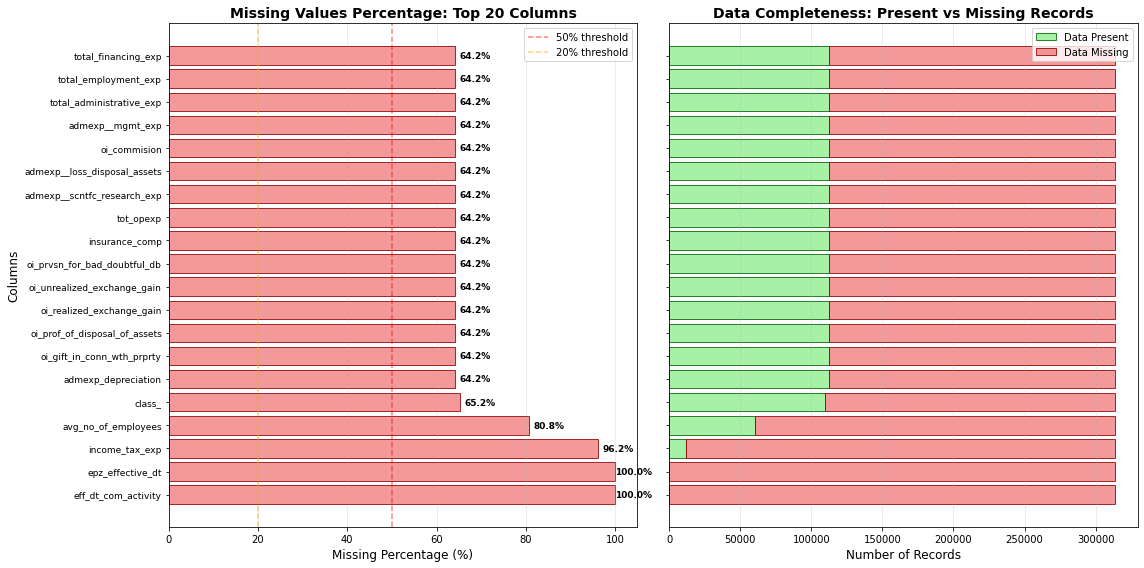


Summary of Top 20 Columns with Missing Values:
------------------------------------------------------------
• Average missing percentage: 70.2%
• Columns with >50% missing: 20
• Columns with >20% missing: 20
• Most missing column: eff_dt_com_activity (100.0% missing)
• Least missing (of top 20): admexp_depreciation (64.2% missing)

2. Business Type Distribution
------------------------------


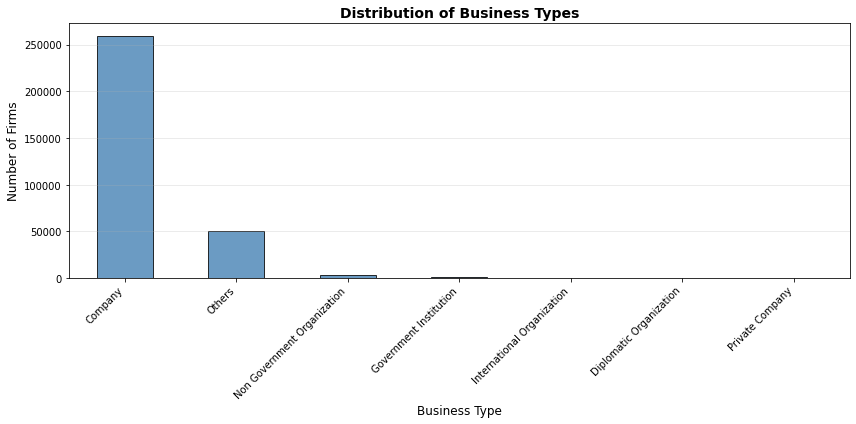

• Total business types: 7
• Top 3: Company (259,766), Others (50,331), Non Government Organization (2,955)
• These 3 types represent: 99.7% of all firms

3. Filing Completeness by Business Type
------------------------------


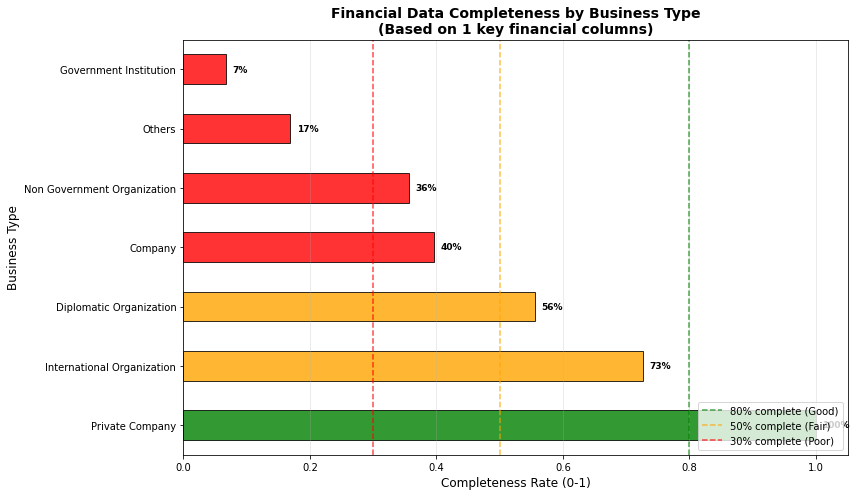


Analysis based on 1 key financial columns:
Key columns used: ['gross_profit'] 
------------------------------------------------------------
• High compliance (>80% complete): 1 business types
  Top performers:
    ✓ Private Company: 100.0% complete

• Medium compliance (50-80% complete): 2 business types

• Low compliance (<50% complete): 4 business types
  Needs attention:
    ✗ Government Institution: 6.8% complete
    ✗ Others: 16.9% complete
    ✗ Non Government Organization: 35.6% complete

• Overall completeness rate: 46.7%


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. MISSING DATA ANALYSIS 
print("1. Missing Data Patterns")
print("-" * 30)

# Get top 20 columns with missing values
top_missing = cols_with_missing.sort_values('Missing_Percent', ascending=False).head(20)

# Fix: Check if Missing_Percent values are already multiplied by 100
# If average is > 100, they're likely already percentages
if top_missing['Missing_Percent'].mean() > 1:
    # Convert from percentage (like 70.5) to decimal (0.705)
    top_missing = top_missing.copy()
    top_missing['Missing_Percent'] = top_missing['Missing_Percent'] / 100

# Calculate missing counts if not already in the DataFrame
if 'Missing_Count' not in top_missing.columns or 'Non_Missing_Count' not in top_missing.columns:
    # Calculate missing counts for each column
    missing_counts = []
    non_missing_counts = []
    total_counts = []
    
    for col in top_missing.index:
        missing_count = df[col].isnull().sum()
        non_missing_count = df[col].notnull().sum()
        total_count = len(df)
        
        missing_counts.append(missing_count)
        non_missing_counts.append(non_missing_count)
        total_counts.append(total_count)
    
    # Add these columns to top_missing
    top_missing = top_missing.copy()
    top_missing['Missing_Count'] = missing_counts
    top_missing['Non_Missing_Count'] = non_missing_counts
    top_missing['Total_Count'] = total_counts

# Bar chart visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Left: Missing percentages (horizontal bar chart)
missing_pct = top_missing['Missing_Percent'] * 100  # Convert to percentage for display
bars1 = axes[0].barh(range(len(missing_pct)), missing_pct.values, 
                     color='lightcoral', edgecolor='darkred', alpha=0.8)
axes[0].set_title('Missing Values Percentage: Top 20 Columns', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Missing Percentage (%)', fontsize=12)
axes[0].set_ylabel('Columns', fontsize=12)
axes[0].set_yticks(range(len(missing_pct)))
axes[0].set_yticklabels(missing_pct.index, fontsize=9)
axes[0].grid(axis='x', alpha=0.3)
axes[0].axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% threshold')
axes[0].axvline(x=20, color='orange', linestyle='--', alpha=0.5, label='20% threshold')
axes[0].legend()

# Add value labels
for i, (bar, pct) in enumerate(zip(bars1, missing_pct.values)):
    axes[0].text(min(pct + 1, 100), bar.get_y() + bar.get_height()/2, 
                 f'{pct:.1f}%', va='center', fontweight='bold', fontsize=9)

# Right: Stacked bar chart (Present vs Missing counts)
bars_present = axes[1].barh(range(len(top_missing)), top_missing['Non_Missing_Count'].values,
                           color='lightgreen', edgecolor='darkgreen', label='Data Present', alpha=0.8)
bars_missing = axes[1].barh(range(len(top_missing)), top_missing['Missing_Count'].values,
                           left=top_missing['Non_Missing_Count'].values,
                           color='lightcoral', edgecolor='darkred', label='Data Missing', alpha=0.8)
axes[1].set_title('Data Completeness: Present vs Missing Records', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Records', fontsize=12)
axes[1].set_yticks(range(len(top_missing)))
axes[1].set_yticklabels([])  # Hide duplicate labels
axes[1].legend()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print(f"\nSummary of Top 20 Columns with Missing Values:")
print("-" * 60)
print(f"• Average missing percentage: {missing_pct.mean():.1f}%")
print(f"• Columns with >50% missing: {len(missing_pct[missing_pct > 50])}")
print(f"• Columns with >20% missing: {len(missing_pct[missing_pct > 20])}")
print(f"• Most missing column: {missing_pct.idxmax()} ({missing_pct.max():.1f}% missing)")
print(f"• Least missing (of top 20): {missing_pct.idxmin()} ({missing_pct.min():.1f}% missing)")

# 2. BUSINESS TYPE DISTRIBUTION
print("\n2. Business Type Distribution")
print("-" * 30)

plt.figure(figsize=(12, 6))
business_counts = df['business_type'].value_counts()
business_counts.plot(kind='bar', color='steelblue', edgecolor='black', alpha=0.8)
plt.title('Distribution of Business Types', fontsize=14, fontweight='bold')
plt.xlabel('Business Type', fontsize=12)
plt.ylabel('Number of Firms', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print(f"• Total business types: {len(business_counts)}")
print(f"• Top 3: {business_counts.index[0]} ({business_counts.iloc[0]:,}), "
      f"{business_counts.index[1]} ({business_counts.iloc[1]:,}), "
      f"{business_counts.index[2]} ({business_counts.iloc[2]:,})")
print(f"• These 3 types represent: {100*(business_counts.iloc[:3].sum()/len(df)):.1f}% of all firms")

# 3. FILING COMPLETENESS BY BUSINESS TYPE 
print("\n3. Filing Completeness by Business Type")
print("-" * 30)

# Check key financial columns 
key_financial_columns = [
    'total_revenue', 'total_assets', 'net_income', 'total_liabilities',
    'gross_profit', 'operating_income', 'total_equity', 'current_assets',
    'current_liabilities', 'cash_flow_operations'
]

# Find which of these columns exist in the dataframe
existing_key_cols = [col for col in key_financial_columns if col in df.columns]

if len(existing_key_cols) > 0:
    # Calculate completeness for each business type
    # Create a completeness score: percentage of key columns that are not null
    completeness_by_type = {}
    
    for biz_type in df['business_type'].unique():
        subset = df[df['business_type'] == biz_type]
        
        # Calculate percentage of key columns that have data for each firm
        completeness_scores = []
        for idx, row in subset.iterrows():
            # Count how many key columns have data (not null)
            non_null_count = sum(1 for col in existing_key_cols if pd.notna(row[col]))
            completeness = non_null_count / len(existing_key_cols) if len(existing_key_cols) > 0 else 0
            completeness_scores.append(completeness)
        
        # Average completeness for this business type
        completeness_by_type[biz_type] = np.mean(completeness_scores) if completeness_scores else 0
    
    # Convert to Series and sort
    filing_by_type = pd.Series(completeness_by_type).sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(12, 7))
    colors = ['green' if x > 0.8 else 'orange' if x > 0.5 else 'red' for x in filing_by_type.values]
    bars3 = filing_by_type.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8, figsize=(12, 7))
    plt.title(f'Financial Data Completeness by Business Type\n(Based on {len(existing_key_cols)} key financial columns)', 
              fontsize=14, fontweight='bold')
    plt.xlabel('Completeness Rate (0-1)', fontsize=12)
    plt.ylabel('Business Type', fontsize=12)
    plt.axvline(x=0.8, color='green', linestyle='--', alpha=0.7, linewidth=1.5, label='80% complete (Good)')
    plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.7, linewidth=1.5, label='50% complete (Fair)')
    plt.axvline(x=0.3, color='red', linestyle='--', alpha=0.7, linewidth=1.5, label='30% complete (Poor)')
    plt.legend(loc='lower right')
    plt.grid(axis='x', alpha=0.3)
    
    # Add percentage labels to bars
    for i, (bar, rate) in enumerate(zip(bars3.patches, filing_by_type.values)):
        completeness_pct = 100 * rate
        if bar.get_width() > 0:  # Only label if bar has width
            plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2, 
                     f'{completeness_pct:.0f}%', va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Print compliance analysis
    print(f"\nAnalysis based on {len(existing_key_cols)} key financial columns:")
    print("Key columns used:", existing_key_cols[:5], "..." if len(existing_key_cols) > 5 else "")
    print("-" * 60)
    
    high_compliance = filing_by_type[filing_by_type > 0.8]
    medium_compliance = filing_by_type[(filing_by_type >= 0.5) & (filing_by_type <= 0.8)]
    low_compliance = filing_by_type[filing_by_type < 0.5]
    
    print(f"• High compliance (>80% complete): {len(high_compliance)} business types")
    if len(high_compliance) > 0:
        print("  Top performers:")
        for biz_type, rate in high_compliance.head(3).items():
            print(f"    ✓ {biz_type}: {100*rate:.1f}% complete")
    
    print(f"\n• Medium compliance (50-80% complete): {len(medium_compliance)} business types")
    
    print(f"\n• Low compliance (<50% complete): {len(low_compliance)} business types")
    if len(low_compliance) > 0:
        print("  Needs attention:")
        for biz_type, rate in low_compliance.sort_values().head(3).items():
            print(f"    ✗ {biz_type}: {100*rate:.1f}% complete")
    
    print(f"\n• Overall completeness rate: {100*filing_by_type.mean():.1f}%")
    
else:
    print("Warning: No standard key financial columns found in dataset.")
    print("Consider creating a custom 'MISSING_KEY_DATA' column or specifying your key columns.")
    
    # Alternative: Show missing rate for a sample column
    sample_col = df.select_dtypes(include=[np.number]).columns[0] if len(df.select_dtypes(include=[np.number]).columns) > 0 else df.columns[0]
    print(f"\nShowing completeness for sample column '{sample_col}':")
    
    filing_by_type = df.groupby('business_type')[sample_col].apply(lambda x: x.notnull().mean()).sort_values()
    
    plt.figure(figsize=(12, 7))
    colors = ['green' if x > 0.8 else 'orange' if x > 0.5 else 'red' for x in filing_by_type.values]
    filing_by_type.plot(kind='barh', color=colors, edgecolor='black', alpha=0.8)
    plt.title(f"Data Completeness by Business Type\n(Based on column: {sample_col})", fontsize=14, fontweight='bold')
    plt.xlabel('Completeness Rate', fontsize=12)
    plt.ylabel('Business Type', fontsize=12)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()

### FILING BEHAVIOR ANALYSIS


In [3]:
# Check if missingness is systematic
df['MISSING_KEY_DATA'] = df[['profit_loss_before_tax', 'grossturnover']].isnull().all(axis=1).astype(int)
missing_rate = df['MISSING_KEY_DATA'].mean() * 100
print(f"• Firms missing ALL key financials: {missing_rate:.1f}%")

# Analyze by business type
if 'business_type' in df.columns:
    print(f"\n• Missing rate by business type:")
    missing_by_type = df.groupby('business_type')['MISSING_KEY_DATA'].mean() * 100
    print(missing_by_type.sort_values(ascending=False))

• Firms missing ALL key financials: 64.2%

• Missing rate by business type:
business_type
Government Institution         93.178893
Others                         83.097892
Non Government Organization    64.365482
Company                        60.395125
Diplomatic Organization        44.444444
International Organization     27.272727
Private Company                 0.000000
Name: MISSING_KEY_DATA, dtype: float64


### DATA PREPARATION


In [4]:
# 1. CREATE COMPLETE DATA SUBSET (Based on missing values analysis)
print("1. Creating Modeling Subset (Complete Financial Data)")
print("-" * 40)

# Identify firms with complete key financial data
key_financials = ['profit_loss_before_tax', 'grossturnover', 'gross_profit']
df['HAS_COMPLETE_FINANCIALS'] = df[key_financials].notna().all(axis=1).astype(int)

complete_mask = df['HAS_COMPLETE_FINANCIALS'] == 1
df_model = df[complete_mask].copy()

print(f"• Original dataset: {len(df):,} firms")
print(f"• Modeling subset:  {len(df_model):,} firms ({len(df_model)/len(df)*100:.1f}%)")
print(f"• Business types retained:")
print(df_model['business_type'].value_counts())
print()

# 2. CREATE TARGET VARIABLE
print("2. Creating Target Variable (LOSS_FLAG)")
df_model['LOSS_FLAG'] = (df_model['profit_loss_before_tax'] < 0).astype(int)
loss_rate = df_model['LOSS_FLAG'].mean() * 100
print(f"   • Loss rate in modeling subset: {loss_rate:.1f}% ({df_model['LOSS_FLAG'].sum():,} firms)")
print(f"   • Distribution: {df_model['LOSS_FLAG'].value_counts().to_dict()}")
print()

# 3. FEATURE ENGINEERING
print("3. Engineering Financial Ratios")
print("-" * 25)

def safe_divide(num, denom):
    return np.where(denom != 0, num / denom, np.nan)

ratios_created = []
if 'grossturnover' in df_model.columns:
    # Profitability ratios
    df_model['PROFIT_MARGIN'] = safe_divide(df_model['profit_loss_before_tax'], df_model['grossturnover'])
    ratios_created.append('PROFIT_MARGIN')
    
    df_model['GROSS_MARGIN'] = safe_divide(df_model['gross_profit'], df_model['grossturnover'])
    ratios_created.append('GROSS_MARGIN')
    
    # Cost structure ratios
    if 'total_employment_exp' in df_model.columns:
        df_model['EMPLOYMENT_COST_RATIO'] = safe_divide(df_model['total_employment_exp'], df_model['grossturnover'])
        ratios_created.append('EMPLOYMENT_COST_RATIO')
    
    if 'cost_of_sales' in df_model.columns:
        df_model['COST_OF_SALES_RATIO'] = safe_divide(df_model['cost_of_sales'], df_model['grossturnover'])
        ratios_created.append('COST_OF_SALES_RATIO')

print(f"   • Created {len(ratios_created)} financial ratios:")
for ratio in ratios_created:
    non_null = df_model[ratio].notna().sum()
    print(f"     - {ratio}: {non_null:,} values")
print()

# 4. DATA CLEANING
print("4. Cleaning Data")
print("-" * 25)

# 4.1 Check for duplicates in modeling subset
print("4.1 Checking for duplicates...")
duplicate_count = df_model.duplicated().sum()
if duplicate_count > 0:
    print(f"   • Found {duplicate_count:,} duplicates ({duplicate_count/len(df_model)*100:.2f}%)")
    df_model = df_model.drop_duplicates()
    print(f"   • Removed. New shape: {df_model.shape[0]:,} rows")
else:
    print("   • No duplicates found")
print()

# 4.2 Winsorize financial ratios (1st-99th percentile)
print("4.2 Winsorizing financial ratios...")
for ratio in ratios_created:
    if df_model[ratio].notna().sum() > 0:
        lower = df_model[ratio].quantile(0.01)
        upper = df_model[ratio].quantile(0.99)
        df_model[ratio] = df_model[ratio].clip(lower=lower, upper=upper)
        print(f"   • {ratio}: [{lower:.3f}, {upper:.3f}]")
print("   • Winsorization complete")
print()

# 4.3 Handle missing values in ratios
print("4.3 Handling missing values...")
for ratio in ratios_created:
    missing = df_model[ratio].isna().sum()
    if missing > 0:
        df_model[ratio] = df_model[ratio].fillna(0)
        print(f"   • {ratio}: {missing:,} NaN → 0")
print()

# 5. MULTICOLLINEARITY CHECK (VIF)
print("5. Checking Multicollinearity (VIF)")
print("-" * 25)

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import warnings
warnings.filterwarnings('ignore', category=FutureWarning, module='statsmodels')

# Define features for modeling
features = ratios_created + ['grossturnover', 'gross_profit']
features = [f for f in features if f in df_model.columns]

print(f"   • Analyzing {len(features)} features for multicollinearity:")
for feat in features:
    print(f"     - {feat}")

# Prepare data for VIF
X_vif = df_model[features].fillna(0)

if len(X_vif.columns) > 1:
    X_vif_const = add_constant(X_vif)
    
    vif_data = pd.DataFrame()
    vif_data["feature"] = X_vif_const.columns
    vif_data["VIF"] = [variance_inflation_factor(X_vif_const.values, i) 
                       for i in range(len(X_vif_const.columns))]
    
    # Check results
    high_vif = vif_data[vif_data['VIF'] > 10]
    if len(high_vif) > 0:
        print(f"\n   Found {len(high_vif)} features with VIF > 10:")
        display(high_vif.sort_values('VIF', ascending=False))
        print("   • Solution: Will use LASSO regularization")
    else:
        print(f"\n   ✓ No severe multicollinearity (all VIF < 10)")
    
    print(f"\n   VIF Summary:")
    print(f"   • Max VIF: {vif_data['VIF'].max():.1f}")
    print(f"   • Min VIF: {vif_data['VIF'].min():.1f}")
    print(f"   • Mean VIF: {vif_data['VIF'].mean():.1f}")
    print(f"   • Features with VIF > 5: {(vif_data['VIF'] > 5).sum()}")
else:
    print("   • Not enough features for VIF check")

print()

# 6. PREPARE FOR MODELING
print("6. Preparing for Modeling")
print("-" * 25)

# Final feature set
model_features = features.copy()

# Add categorical variables if needed
categorical_vars = ['business_type', 'business_subtype', 'return_type', 'assmt_type']
for cat_var in categorical_vars:
    if cat_var in df_model.columns and df_model[cat_var].nunique() > 1:
        model_features.append(cat_var)
        print(f"   • Added categorical: {cat_var}")

print(f"\n   Final feature set: {len(model_features)} variables")
print(f"   • Target: LOSS_FLAG (loss rate: {loss_rate:.1f}%)")
print(f"   • Dataset ready: {df_model.shape[0]:,} firms")


1. Creating Modeling Subset (Complete Financial Data)
----------------------------------------
• Original dataset: 313,870 firms
• Modeling subset:  112,520 firms (35.8%)
• Business types retained:
Company                        102880
Others                           8507
Non Government Organization      1053
Government Institution             53
International Organization         16
Diplomatic Organization            10
Private Company                     1
Name: business_type, dtype: int64

2. Creating Target Variable (LOSS_FLAG)
   • Loss rate in modeling subset: 39.5% (44,407 firms)
   • Distribution: {0: 68113, 1: 44407}

3. Engineering Financial Ratios
-------------------------
   • Created 4 financial ratios:
     - PROFIT_MARGIN: 99,511 values
     - GROSS_MARGIN: 99,511 values
     - EMPLOYMENT_COST_RATIO: 99,511 values
     - COST_OF_SALES_RATIO: 99,511 values

4. Cleaning Data
-------------------------
4.1 Checking for duplicates...
   • Found 28 duplicates (0.02%)
   • Rem

### EDA: UNIVARIATE, BIVARIATE & OUTLIER ANALYSIS


1. UNIVARIATE ANALYSIS: Distributions of Financial Ratios
--------------------------------------------------


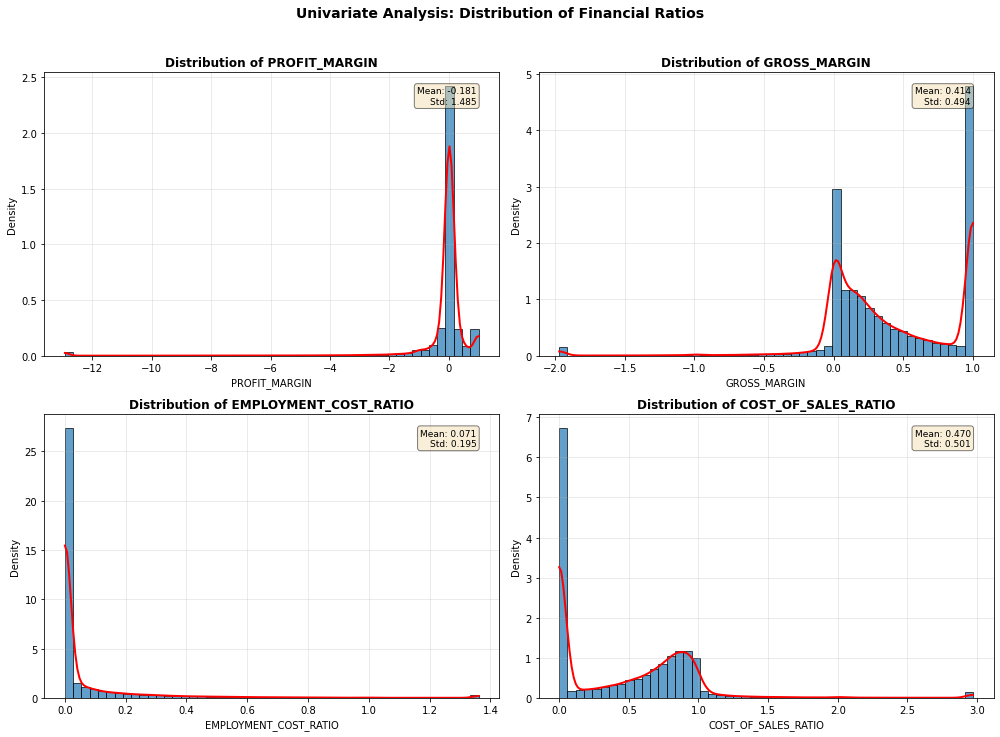


2. BIVARIATE ANALYSIS: Correlation Matrix
--------------------------------------------------


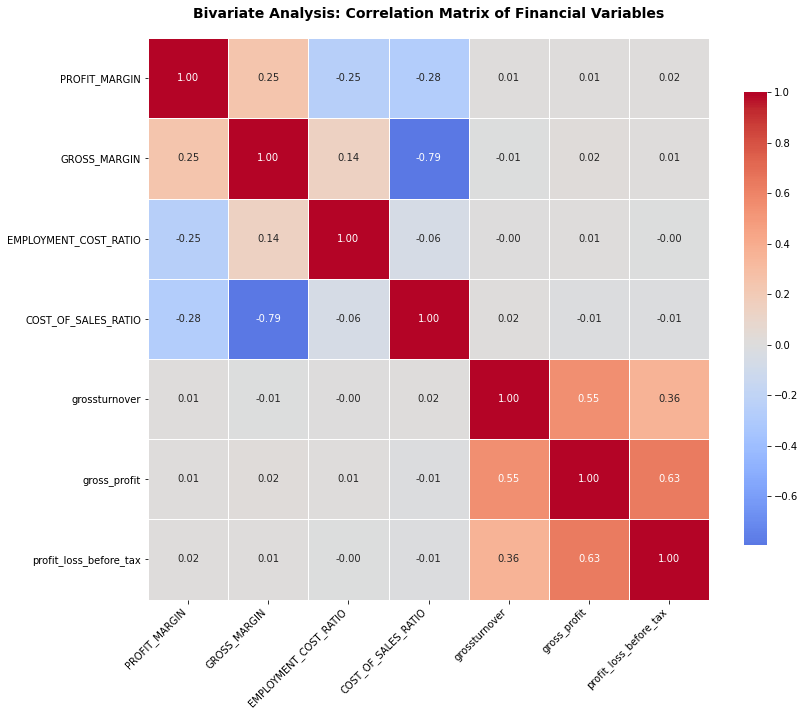

Strong Correlations (|r| > 0.7):
  • GROSS_MARGIN ↔ COST_OF_SALES_RATIO: -0.794

3. OUTLIER DETECTION: Box Plots of Financial Ratios
--------------------------------------------------


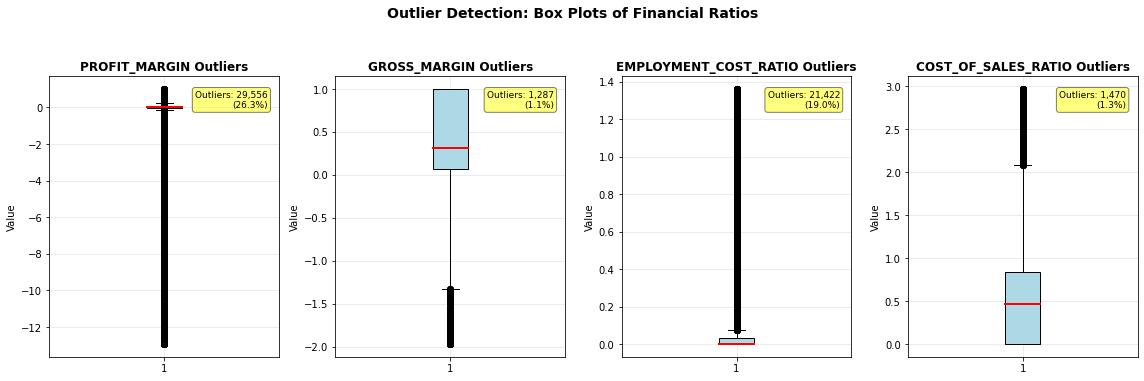


4. TARGET ANALYSIS: Loss vs Profit Firms
--------------------------------------------------


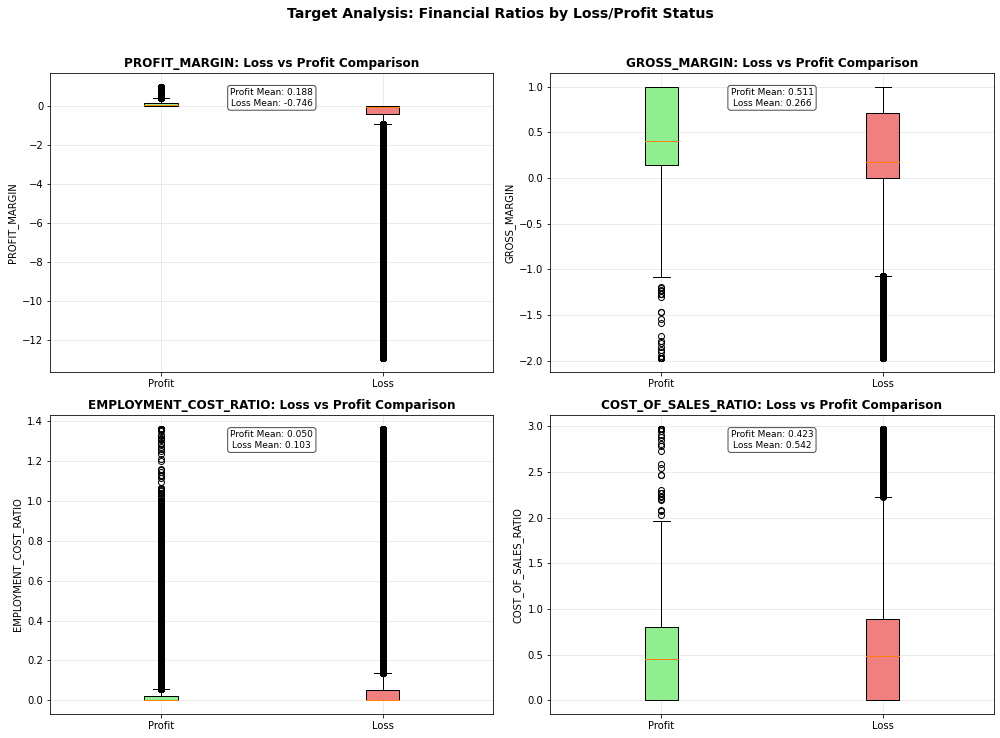


5. STATISTICAL SUMMARY: Key Findings
--------------------------------------------------
A. Loss vs Profit Comparison (Mean Values):
                       Profit Firms  Loss Firms  Difference
PROFIT_MARGIN                 0.188      -0.746      -0.934
GROSS_MARGIN                  0.511       0.266      -0.245
EMPLOYMENT_COST_RATIO         0.050       0.103       0.053
COST_OF_SALES_RATIO           0.423       0.542       0.118

B. Outlier Summary (IQR Method):
  • PROFIT_MARGIN: 29,556 outliers (26.3%)
  • GROSS_MARGIN: 1,287 outliers (1.1%)
  • EMPLOYMENT_COST_RATIO: 21,422 outliers (19.0%)
  • COST_OF_SALES_RATIO: 1,470 outliers (1.3%)


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. UNIVARIATE: DISTRIBUTIONS
print("1. UNIVARIATE ANALYSIS: Distributions of Financial Ratios")
print("-" * 50)

# Create subplots for each ratio
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
ratios_to_plot = ['PROFIT_MARGIN', 'GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO', 'COST_OF_SALES_RATIO']

for idx, ratio in enumerate(ratios_to_plot):
    ax = axes[idx//2, idx%2]
    
    # Histogram with density curve
    n, bins, patches = ax.hist(df_model[ratio].dropna(), bins=50, 
                               edgecolor='black', alpha=0.7, density=True)
    
    # Add density curve
    from scipy import stats
    kde = stats.gaussian_kde(df_model[ratio].dropna())
    x_vals = np.linspace(bins[0], bins[-1], 200)
    ax.plot(x_vals, kde(x_vals), 'r-', linewidth=2)
    
    ax.set_title(f'Distribution of {ratio}', fontsize=12, fontweight='bold')
    ax.set_xlabel(ratio)
    ax.set_ylabel('Density')
    ax.grid(True, alpha=0.3)
    
    # Add statistics box
    stats_text = f"Mean: {df_model[ratio].mean():.3f}\nStd: {df_model[ratio].std():.3f}"
    ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
            fontsize=9, verticalalignment='top', horizontalalignment='right',
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.suptitle('Univariate Analysis: Distribution of Financial Ratios', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 2. BIVARIATE: CORRELATION ANALYSIS
print("\n2. BIVARIATE ANALYSIS: Correlation Matrix")
print("-" * 50)

# Calculate correlations
corr_features = ratios_to_plot + ['grossturnover', 'gross_profit', 'profit_loss_before_tax']
corr_features = [f for f in corr_features if f in df_model.columns]
corr_matrix = df_model[corr_features].corr()

# Create heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Bivariate Analysis: Correlation Matrix of Financial Variables', 
          fontsize=14, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Highlight strong correlations
print("Strong Correlations (|r| > 0.7):")
strong_corrs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            strong_corrs.append((corr_matrix.columns[i], corr_matrix.columns[j], 
                                 corr_matrix.iloc[i, j]))

if strong_corrs:
    for col1, col2, corr in strong_corrs:
        print(f"  • {col1} ↔ {col2}: {corr:.3f}")
else:
    print("  • No very strong correlations found")

# 3. OUTLIER DETECTION: BOX PLOTS
print("\n3. OUTLIER DETECTION: Box Plots of Financial Ratios")
print("-" * 50)

fig, axes = plt.subplots(1, 4, figsize=(16, 5))
for idx, ratio in enumerate(ratios_to_plot):
    # Create box plot
    bp = axes[idx].boxplot(df_model[ratio].dropna(), patch_artist=True)
    
    # Customize box plot
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set_color('red')
    bp['medians'][0].set_linewidth(2)
    
    axes[idx].set_title(f'{ratio} Outliers', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(True, alpha=0.3)
    
    # Calculate outlier count using IQR method
    Q1 = df_model[ratio].quantile(0.25)
    Q3 = df_model[ratio].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[ratio] < lower_bound) | (df_model[ratio] > upper_bound)]
    
    # Add outlier count to plot
    axes[idx].text(0.95, 0.95, f'Outliers: {len(outliers):,}\n({len(outliers)/len(df_model)*100:.1f}%)',
                   transform=axes[idx].transAxes, fontsize=9,
                   verticalalignment='top', horizontalalignment='right',
                   bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

plt.suptitle('Outlier Detection: Box Plots of Financial Ratios', 
             fontsize=14, fontweight='bold', y=1.05)
plt.tight_layout()
plt.show()

# 4. TARGET ANALYSIS: LOSS VS PROFIT COMPARISON
print("\n4. TARGET ANALYSIS: Loss vs Profit Firms")
print("-" * 50)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
for idx, ratio in enumerate(ratios_to_plot):
    ax = axes[idx//2, idx%2]
    
    # Create side-by-side box plots for loss vs profit
    loss_data = df_model[df_model['LOSS_FLAG'] == 1][ratio].dropna()
    profit_data = df_model[df_model['LOSS_FLAG'] == 0][ratio].dropna()
    
    box_data = [profit_data, loss_data]
    bp = ax.boxplot(box_data, patch_artist=True, labels=['Profit', 'Loss'])
    
    # Color boxes
    colors = ['lightgreen', 'lightcoral']
    for patch, color in zip(bp['boxes'], colors):
        patch.set_facecolor(color)
    
    ax.set_title(f'{ratio}: Loss vs Profit Comparison', fontsize=12, fontweight='bold')
    ax.set_ylabel(ratio)
    ax.grid(True, alpha=0.3)
    
    # Add mean values
    profit_mean = profit_data.mean()
    loss_mean = loss_data.mean()
    ax.text(0.5, 0.95, f'Profit Mean: {profit_mean:.3f}\nLoss Mean: {loss_mean:.3f}',
            transform=ax.transAxes, fontsize=9, verticalalignment='top',
            horizontalalignment='center',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.7))

plt.suptitle('Target Analysis: Financial Ratios by Loss/Profit Status', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 5. STATISTICAL SUMMARY
print("\n5. STATISTICAL SUMMARY: Key Findings")
print("-" * 50)

print("A. Loss vs Profit Comparison (Mean Values):")
comparison_df = df_model.groupby('LOSS_FLAG')[ratios_to_plot].mean().T
comparison_df.columns = ['Profit Firms', 'Loss Firms']
comparison_df['Difference'] = comparison_df['Loss Firms'] - comparison_df['Profit Firms']
print(comparison_df.round(3))
print()

print("B. Outlier Summary (IQR Method):")
for ratio in ratios_to_plot:
    Q1 = df_model[ratio].quantile(0.25)
    Q3 = df_model[ratio].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df_model[(df_model[ratio] < lower_bound) | (df_model[ratio] > upper_bound)]
    outlier_pct = len(outliers)/len(df_model)*100
    
    print(f"  • {ratio}: {len(outliers):,} outliers ({outlier_pct:.1f}%)")


### ADVANCED EDA VISUALIZATIONS


1. Loss Rate by Business Type (Among Filers)
----------------------------------------


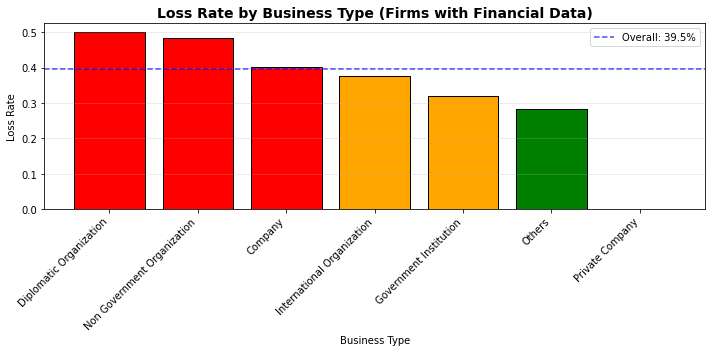

• Highest loss rates:
   Diplomatic Organization: 50.0% loss rate
   Non Government Organization: 48.3% loss rate
   Company: 40.3% loss rate

• Lowest loss rates:
  ✓ Government Institution: 32.1% loss rate
  ✓ Others: 28.3% loss rate
  ✓ Private Company: 0.0% loss rate

2. Key Financial Metrics Distribution (Log Scale)
----------------------------------------


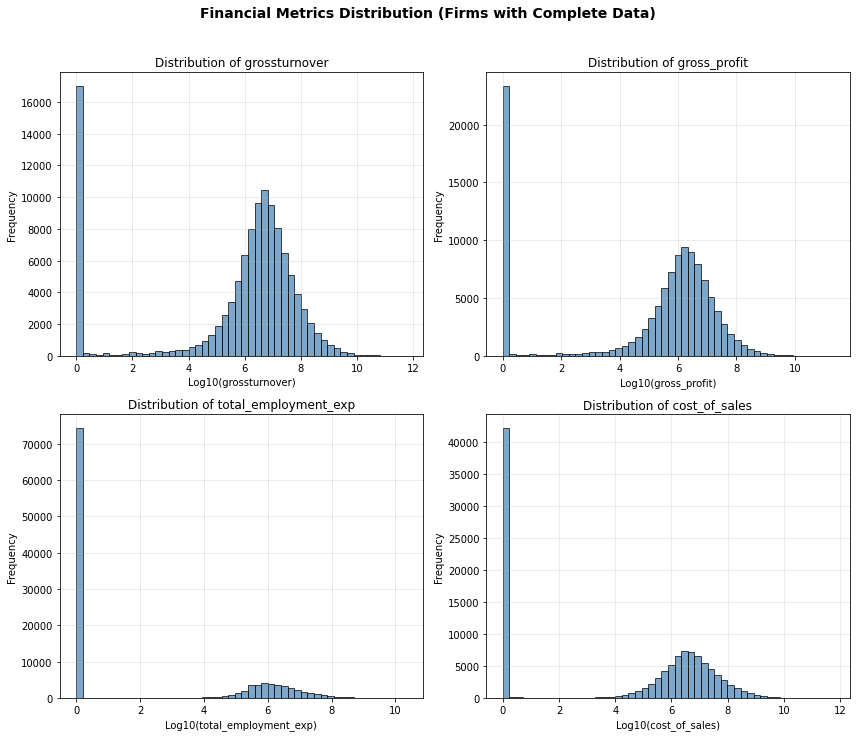


3. Relationship: Key Financial Ratios
----------------------------------------


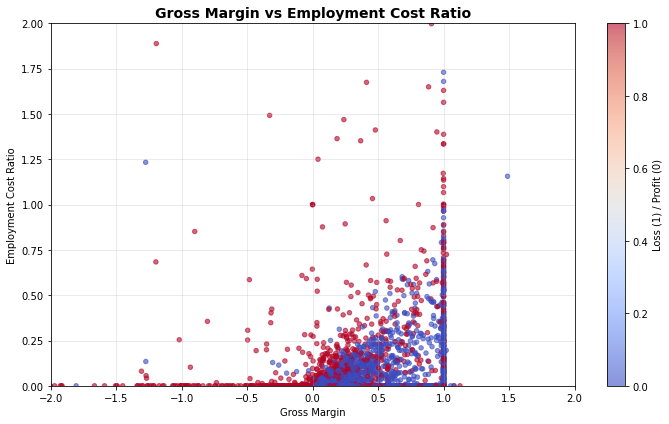

• Sample size for scatter plot: 5000
• Color indicates: Red = Loss firms, Blue = Profit firms
• Pattern: Loss firms tend toward lower right quadrant


In [6]:
# 1. TARGET DISTRIBUTION: LOSS RATE BY BUSINESS TYPE
print("1. Loss Rate by Business Type (Among Filers)")
print("-" * 40)

# Create LOSS_FLAG in the filtered dataset for visualization
has_financials = df[df['MISSING_KEY_DATA'] == 0].copy()
has_financials['LOSS_FLAG'] = (has_financials['profit_loss_before_tax'] < 0).astype(int)

# Calculate loss rates
loss_by_type = has_financials.groupby('business_type')['LOSS_FLAG'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
bars = plt.bar(range(len(loss_by_type)), loss_by_type.values, 
               color=['red' if x > 0.4 else 'orange' if x > 0.3 else 'green' for x in loss_by_type.values],
               edgecolor='black')
plt.title('Loss Rate by Business Type (Firms with Financial Data)', fontsize=14, fontweight='bold')
plt.xlabel('Business Type')
plt.ylabel('Loss Rate')
plt.xticks(range(len(loss_by_type)), loss_by_type.index, rotation=45, ha='right')
plt.axhline(y=0.395, color='blue', linestyle='--', label=f'Overall: {0.395*100:.1f}%', alpha=0.7)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("• Highest loss rates:")
for biz_type, rate in loss_by_type.head(3).items():
    print(f"   {biz_type}: {rate*100:.1f}% loss rate")
print("\n• Lowest loss rates:")
for biz_type, rate in loss_by_type.tail(3).items():
    print(f"  ✓ {biz_type}: {rate*100:.1f}% loss rate")

# 2. FINANCIAL METRICS DISTRIBUTION (Log Scale) - FIXED
print("\n2. Key Financial Metrics Distribution (Log Scale)")
print("-" * 40)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
financial_cols = ['grossturnover', 'gross_profit', 'total_employment_exp', 'cost_of_sales']

for idx, col in enumerate(financial_cols):
    ax = axes[idx//2, idx%2]
    data = has_financials[col].dropna()
    
    if len(data) > 0:
        # Log transform for better visualization (add small value to avoid log(0))
        log_data = np.log10(data.clip(lower=1))
        ax.hist(log_data, bins=50, edgecolor='black', alpha=0.7, color='steelblue')
        ax.set_title(f'Distribution of {col}', fontsize=12)
        ax.set_xlabel(f'Log10({col})')
        ax.set_ylabel('Frequency')
        ax.grid(alpha=0.3)
    else:
        ax.text(0.5, 0.5, f'No data for {col}', 
                ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{col} (No Data)', fontsize=12)

plt.suptitle('Financial Metrics Distribution (Firms with Complete Data)', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 3. SCATTER PLOT: GROSS MARGIN vs EMPLOYMENT COST - FIXED
print("\n3. Relationship: Key Financial Ratios")
print("-" * 40)

# Create ratios for visualization in has_financials
has_financials['GROSS_MARGIN_VIS'] = has_financials['gross_profit'] / has_financials['grossturnover'].replace(0, np.nan)
has_financials['EMPLOYMENT_COST_RATIO_VIS'] = has_financials['total_employment_exp'] / has_financials['grossturnover'].replace(0, np.nan)

# Remove infinite values
has_financials = has_financials.replace([np.inf, -np.inf], np.nan)
has_financials_clean = has_financials.dropna(subset=['GROSS_MARGIN_VIS', 'EMPLOYMENT_COST_RATIO_VIS'])

plt.figure(figsize=(10, 6))
# Sample for faster plotting
if len(has_financials_clean) > 5000:
    plot_data = has_financials_clean.sample(n=5000, random_state=42)
else:
    plot_data = has_financials_clean

scatter = plt.scatter(plot_data['GROSS_MARGIN_VIS'], 
                      plot_data['EMPLOYMENT_COST_RATIO_VIS'],
                      c=plot_data['LOSS_FLAG'], 
                      cmap='coolwarm', alpha=0.6, s=20)
plt.colorbar(scatter, label='Loss (1) / Profit (0)')
plt.title('Gross Margin vs Employment Cost Ratio', fontsize=14, fontweight='bold')
plt.xlabel('Gross Margin')
plt.ylabel('Employment Cost Ratio')
plt.xlim(-2, 2)  # Reasonable bounds
plt.ylim(0, 2)   # Reasonable bounds
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("• Sample size for scatter plot:", len(plot_data))
print("• Color indicates: Red = Loss firms, Blue = Profit firms")
print("• Pattern: Loss firms tend toward lower right quadrant")

### FINAL DATA FIXES BASED ON EDA


In [7]:
print("CHECKING CURRENT DATASET FEATURES")
print("="*60)

print(f"DataFrame shape: {df_model.shape}")
print(f"\nCurrent columns in df_model:")
print(df_model.columns.tolist())

print(f"\nLooking for key ratio columns:")
key_ratios = ['PROFIT_MARGIN', 'GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO', 'COST_OF_SALES_RATIO']
for ratio in key_ratios:
    if ratio in df_model.columns:
        print(f"  ✓ {ratio} PRESENT")
    else:
        print(f"  ✗ {ratio} MISSING (already removed)")

CHECKING CURRENT DATASET FEATURES
DataFrame shape: (112492, 68)

Current columns in df_model:
['unique_id', 'business_type', 'business_subtype', 'epz_effective_dt', 'period_from', 'period_to', 'filing_date', 'is_nil_return', 'return_type', 'assmt_type', 'eff_dt_com_activity', 'sector', 'division_', 'group_', 'class_', 'grossturnover', 'cost_of_sales', 'total_opening_stock', 'total_purchase_and_imports', 'odc_tot_of_other_direct_costs', 'odc_factory_rent_and_rates', 'fact_ovh_fuel_and_power', 'fact_ovh_indirect_wages', 'fact_ovh_consumables', 'fact_ovh_depreciation', 'other_factory_overheads', 'total_factory_overheads', 'total_closing_stock', 'gross_profit', 'total_other_income', 'total_other_income_int', 'oi_dividend', 'oi_commision', 'oi_natural_resource_payments', 'oi_royalties', 'oi_gift_in_conn_wth_prprty', 'oi_prof_of_disposal_of_assets', 'oi_realized_exchange_gain', 'oi_unrealized_exchange_gain', 'oi_prvsn_for_bad_doubtful_db', 'insurance_comp', 'tot_opexp', 'admexp_depreciation'

### TRAIN/TEST SPLIT & MODELING


In [8]:
print("OPTIMIZED LASSO LOGISTIC REGRESSION")
print("="*60)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# 1. REDUCED FEATURE SET (Key predictors only)
print("1. Using Reduced Feature Set for Speed")
print("-" * 35)

# Use only 2 most important numerical features (based on EDA)
numerical_features = ['GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO']
# Use only 1 categorical (most important: business_type)
categorical_features = ['business_type']

print(f"   • Numerical: {numerical_features}")
print(f"   • Categorical: {categorical_features}")

# Faster encoding with minimal categories
X_categorical = pd.get_dummies(df_model[categorical_features], drop_first=True)
X_numerical = df_model[numerical_features].fillna(0)
X = pd.concat([X_numerical, X_categorical], axis=1)
y = df_model['LOSS_FLAG']

print(f"   • Total features: {X.shape[1]} (was 28)")
print(f"   • Samples: {X.shape[0]:,}")
print()

# 2. QUICK TRAIN/TEST SPLIT
print("2. Quick Train/Test Split")
print("-" * 35)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"   • Training: {X_train.shape[0]:,} samples")
print(f"   • Testing:  {X_test.shape[0]:,} samples")
print()

# 3. FASTER LASSO TRAINING
print("3. Fast LASSO Training")
print("-" * 35)

# Optimized parameters for speed
fast_model = LogisticRegression(
    penalty='l1',
    solver='liblinear',
    C=0.5,           # Less regularization = faster
    max_iter=200,    # Fewer iterations
    random_state=42
)

fast_model.fit(X_train, y_train)
print("Model trained (fast)")
print(f"   • Non-zero coefficients: {(fast_model.coef_[0] != 0).sum()}/{X.shape[1]}")
print()

# 4. QUICK EVALUATION
print("4. Quick Evaluation")
print("-" * 35)

y_pred = fast_model.predict(X_test)
y_pred_proba = fast_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_test, y_pred_proba)
accuracy = accuracy_score(y_test, y_pred)

print(f"   • AUC-ROC: {auc:.3f}")
print(f"   • Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")
print()

# 5. KEY INSIGHTS ONLY
print("5. Key Business Insights")
print("-" * 35)

coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': fast_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Top 5 Predictors of Loss Reporting:")
for idx, row in coef_df.head(5).iterrows():
    effect = "↑ Increases" if row['Coefficient'] > 0 else "↓ Reduces"
    print(f"   • {row['Feature']}: {effect} risk")
    
print(f"\n   → Strongest predictor: {coef_df['Feature'].iloc[0]}")
print(f"   → Business impact: {coef_df['Feature'].iloc[0]} drives loss probability")


OPTIMIZED LASSO LOGISTIC REGRESSION
1. Using Reduced Feature Set for Speed
-----------------------------------
   • Numerical: ['GROSS_MARGIN', 'EMPLOYMENT_COST_RATIO']
   • Categorical: ['business_type']
   • Total features: 8 (was 28)
   • Samples: 112,492

2. Quick Train/Test Split
-----------------------------------
   • Training: 78,744 samples
   • Testing:  33,748 samples

3. Fast LASSO Training
-----------------------------------
Model trained (fast)
   • Non-zero coefficients: 5/8

4. Quick Evaluation
-----------------------------------
   • AUC-ROC: 0.692
   • Accuracy: 0.677 (67.7%)

5. Key Business Insights
-----------------------------------
Top 5 Predictors of Loss Reporting:
   • EMPLOYMENT_COST_RATIO: ↑ Increases risk
   • GROSS_MARGIN: ↓ Reduces risk
   • business_type_Non Government Organization: ↑ Increases risk
   • business_type_Others: ↓ Reduces risk
   • business_type_Government Institution: ↑ Increases risk

   → Strongest predictor: EMPLOYMENT_COST_RATIO
   → B